In [1]:
import numpy as np
import pandas as pd
import networkx as nx
#import json
#import os
import page_ranker as pr
#import import_graph as ig
import inspect_subgraph as isg

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N =20

In [3]:
G = nx.path_graph(N, create_using=nx.MultiDiGraph)
nx.set_node_attributes(G,'vanilla', 'type')
nx.set_edge_attributes(G,'vanilla', 'type')

In [4]:
G.nodes[0]

{'type': 'vanilla'}

In [5]:
G.edges[(0,1,0)]

{'type': 'vanilla'}

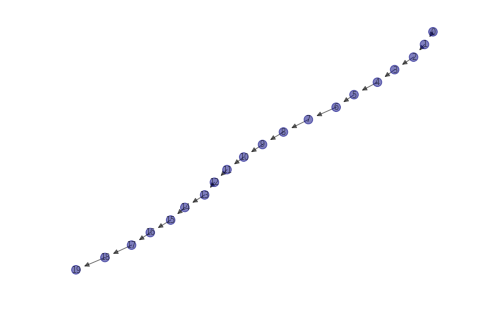

In [6]:
isg.inspectSubGraph(G, G.nodes, expand=False, verbose=False, label=True,pos = "kk")

In [58]:
alpha = .01
iterations = 250

#seed = {n:1/len(G.nodes) for n in G.nodes}
seed = {n:0 for n in G.nodes}
seed[0] =1

node_wt_by_type = {'vanilla': 1}
edge_wt_by_type = {'vanilla': (1,.5)}

self_loop_wt= 1

In [59]:
r, df, g = pr.pageRanker(G,
                         alpha,
                         iterations,
                         seed=seed,
                         initial_value = seed,
                         lazy=True,
                         lazy_decay = True,
                         self_loop_wt=self_loop_wt, 
                         node_wt_by_type =node_wt_by_type,
                         edge_wt_by_type=edge_wt_by_type)

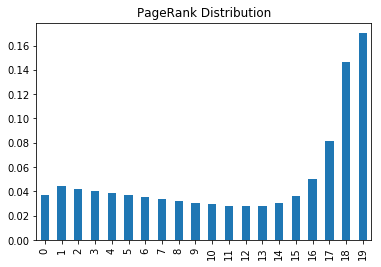

In [60]:
df.tail(1).T.plot(kind='bar',legend=False, title='PageRank Distribution')

Text(0, 0.5, 'PageRank at Iteration')

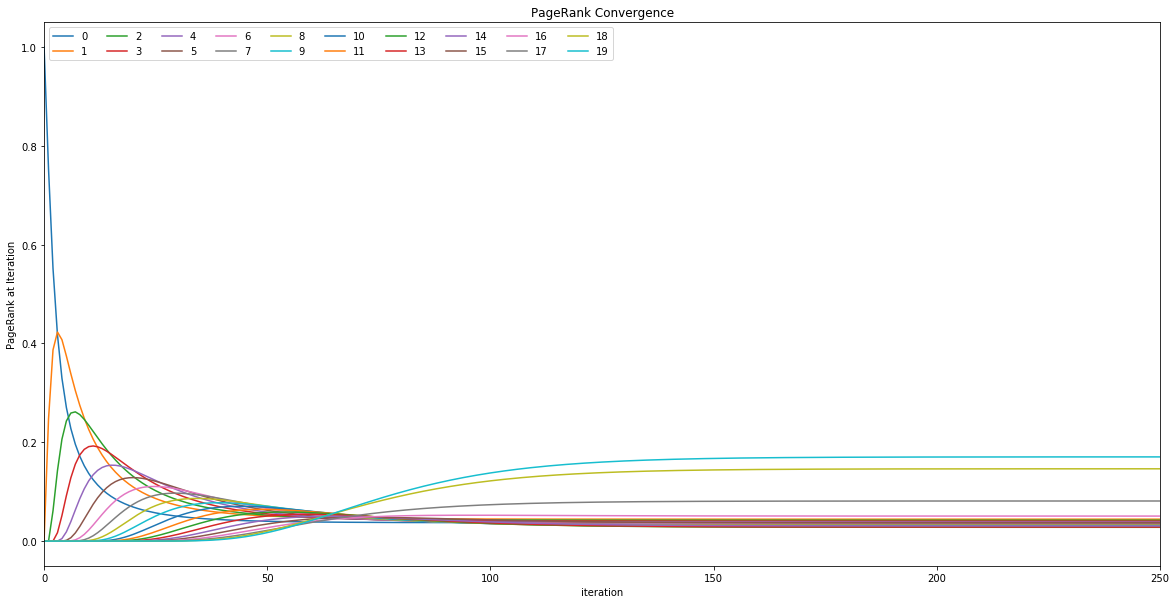

In [61]:
df.plot( figsize=(20,10))
plt.legend(loc='upper left', ncol=10)
plt.title("PageRank Convergence")
plt.xlabel("iteration")
plt.ylabel('PageRank at Iteration')

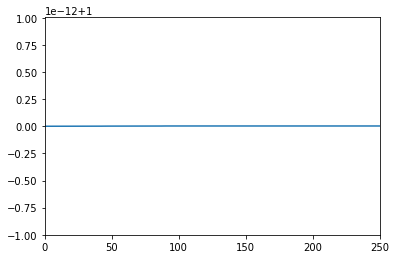

In [62]:
df.sum(axis=1).plot()

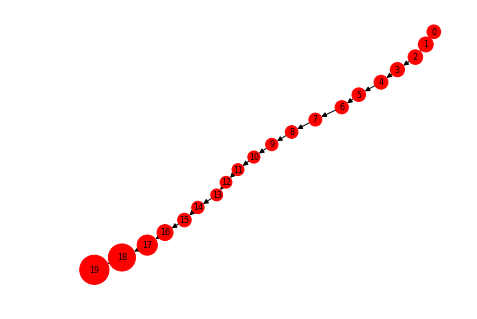

In [63]:
ns = [5000*G.nodes[n]['score'] for n in G.nodes]
nl = {n:n for n in G.nodes}

nx.draw_kamada_kawai(G, node_size=ns, labels=nl, font_size=8)

In [13]:
nx.get_node_attributes(G,'self_wt')

{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1}

In [14]:
nx.get_edge_attributes(G,'out_weight')

{(0, 1, 0): 0.5,
 (1, 2, 0): 0.5,
 (2, 3, 0): 0.5,
 (3, 4, 0): 0.5,
 (4, 5, 0): 0.5,
 (5, 6, 0): 0.5,
 (6, 7, 0): 0.5,
 (7, 8, 0): 0.5,
 (8, 9, 0): 0.5,
 (9, 10, 0): 0.5,
 (10, 11, 0): 0.5,
 (11, 12, 0): 0.5,
 (12, 13, 0): 0.5,
 (13, 14, 0): 0.5,
 (14, 15, 0): 0.5,
 (15, 16, 0): 0.5,
 (16, 17, 0): 0.5,
 (17, 18, 0): 0.5,
 (18, 19, 0): 0.5}

In [15]:
nx.get_edge_attributes(G,'in_weight')

{(0, 1, 0): 1,
 (1, 2, 0): 1,
 (2, 3, 0): 1,
 (3, 4, 0): 1,
 (4, 5, 0): 1,
 (5, 6, 0): 1,
 (6, 7, 0): 1,
 (7, 8, 0): 1,
 (8, 9, 0): 1,
 (9, 10, 0): 1,
 (10, 11, 0): 1,
 (11, 12, 0): 1,
 (12, 13, 0): 1,
 (13, 14, 0): 1,
 (14, 15, 0): 1,
 (15, 16, 0): 1,
 (16, 17, 0): 1,
 (17, 18, 0): 1,
 (18, 19, 0): 1}

In [16]:
nx.get_node_attributes(G,'total_wt')

{0: 2,
 1: 2.5,
 2: 2.5,
 3: 2.5,
 4: 2.5,
 5: 2.5,
 6: 2.5,
 7: 2.5,
 8: 2.5,
 9: 2.5,
 10: 2.5,
 11: 2.5,
 12: 2.5,
 13: 2.5,
 14: 2.5,
 15: 2.5,
 16: 2.5,
 17: 2.5,
 18: 2.5,
 19: 1.5}

In [31]:
alphas = [.1,.03,.01,.003,.001]

R= np.zeros((len(alphas),N))
i=0
for a in alphas:
    r, __, __ = pr.pageRanker(G,
                             a,
                             iterations,
                             seed=seed,
                             initial_value = seed,
                             lazy=True,
                             lazy_decay = True,
                             self_loop_wt=self_loop_wt, 
                             node_wt_by_type =node_wt_by_type,
                             edge_wt_by_type=edge_wt_by_type)
    R[i,:] = r
    i=i+1
    
    

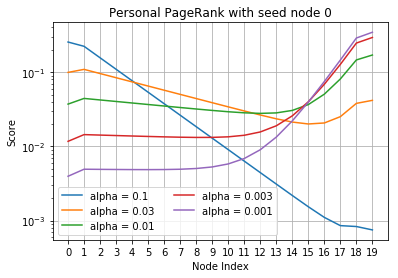

In [42]:
x= [n for n in range(N)]
plt.semilogy(x,R.T)
plt.legend(['alpha = '+str(a) for a in alphas],loc='lower left',ncol=2)
plt.title('Personal PageRank with seed node 0')
plt.ylabel('Score')
plt.xlabel('Node Index')
ax = plt.axes()
ax.set_xticks(x)
ax.grid()

In [33]:
R.T.shape

(20, 5)

In [29]:
range(N)

range(0, 20)

In [21]:
R

array([[0.25485239, 0.22316009, 0.15632712, 0.10950959, 0.07671317,
        0.05373877, 0.03764485, 0.02637081, 0.01847317, 0.01294076,
        0.00906526, 0.00635051, 0.00444906, 0.00311787, 0.00218764,
        0.00154253, 0.00110928, 0.00085905, 0.00083583, 0.00075225],
       [0.0993732 , 0.10916081, 0.09592996, 0.08430281, 0.07408502,
        0.06510588, 0.05721553, 0.05028258, 0.04419233, 0.0388457 ,
        0.0341595 , 0.03006949, 0.0265394 , 0.02358322, 0.02131776,
        0.02008337, 0.02072028, 0.02519825, 0.03805083, 0.0417841 ],
       [0.00396968, 0.00493897, 0.00491722, 0.00489796, 0.00488338,
        0.00487774, 0.00488953, 0.00493558, 0.00504956, 0.00529891,
        0.00581889, 0.00688115, 0.0090315 , 0.01336702, 0.0220932 ,
        0.03964405, 0.07493389, 0.14588411, 0.28852266, 0.34516501],
       [0.01172451, 0.01444249, 0.01423334, 0.01402895, 0.0138309 ,
        0.01364231, 0.01346955, 0.01332547, 0.01323606, 0.01325397,
        0.01348599, 0.01414873, 0.01568179, 0